In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
p1 = Path.cwd() / 'data'

In [3]:
fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
fueleco.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_10848\3919698033.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
C:\Users\admin\AppData\Local\Temp\ipykernel_10848\3919698033.py:1: FutureWarning: Parsed string "Tue Jan 01 00:00:00 EST 2013" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
C:\Users\admin\AppData\Local\Temp\ipykernel_10848\3919698033.py:1: FutureWarning: Parsed string "Tue Jan 01 00:00:00 EST 2013" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [20]:
createdOn_time = pd.to_datetime(fueleco['createdOn'].str.slice(4, 10) + ' ' + fueleco['createdOn'].str.slice(24, 28))
modifiedOn_time = pd.to_datetime(fueleco['modifiedOn'].str.slice(4, 10) + ' ' + fueleco['modifiedOn'].str.slice(24, 28))

In [21]:
fueleco = (fueleco.assign(createdOn=createdOn_time, modifiedOn=modifiedOn_time))
fueleco.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0


In [23]:
fueleco.dtypes, fueleco.dtypes.value_counts()

(barrels08            float64
 barrelsA08           float64
 charge120            float64
 charge240            float64
 city08                 int64
                    ...      
 modifiedOn    datetime64[ns]
 startStop             object
 phevCity               int64
 phevHwy                int64
 phevComb               int64
 Length: 83, dtype: object,
 float64           32
 int64             27
 object            21
 datetime64[ns]     2
 bool               1
 Name: count, dtype: int64)

In [25]:
fueleco['make'].nunique(), fueleco['model'].nunique()

(134, 3816)

In [28]:
fueleco['drive'].isna().mean() * 100

3.0408429451932175

In [29]:
fueleco['drive'].value_counts(dropna=False)

drive
Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: count, dtype: int64

<AxesSubplot:xlabel='make'>

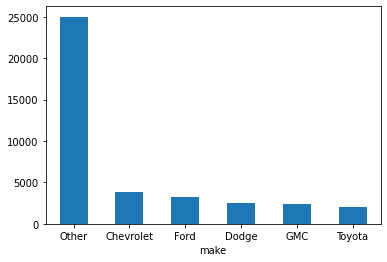

In [35]:
top_n = fueleco['make'].value_counts().index[:5]
top_n_data = fueleco.assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other'))['make'].value_counts()
top_n_data.plot.bar(rot=0)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='make', ylabel='count'>

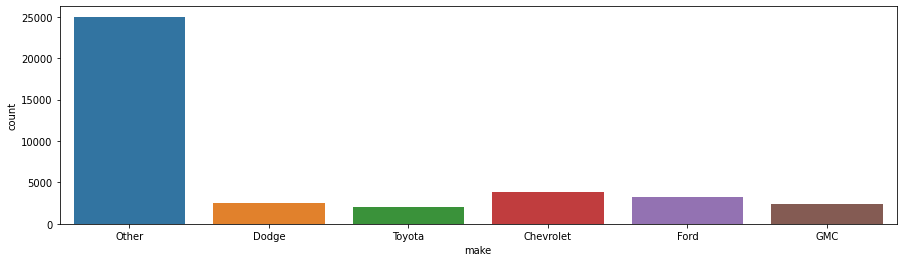

In [36]:
top_n_data2 = fueleco.assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other'))
fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(data=top_n_data2, x='make')

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='make', ylabel='count'>

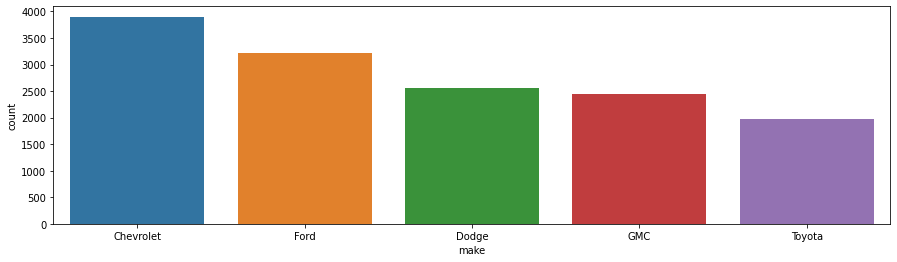

In [38]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(data=fueleco, x='make', order=top_n)

In [39]:
fueleco['rangeA'].value_counts()

rangeA
290            74
270            56
280            53
310            41
277            38
               ..
351             1
240/290/290     1
303             1
340-350         1
341             1
Name: count, Length: 216, dtype: int64

In [46]:
(fueleco['rangeA']
 .str.extract(r'([^0-9.])')
 .dropna()
 #.apply(lambda row: ''.join(row), axis=1)
 .squeeze()
 .value_counts()
)

0
/    280
-     71
Name: count, dtype: int64

In [50]:
fueleco['rangeA'].isna().sum()

37616

In [58]:
(fueleco['rangeA']
 .fillna('0')
 .str.replace('-', '/')
 .str.split('/', expand=True)
 .astype('float')
 .mean(axis=1)
 .pipe(lambda ser: pd.cut(ser, bins=10, labels=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450]))
 .value_counts()
)

0      37688
300      559
350      352
400      205
250      181
450       82
100       12
200        9
50         8
150        5
Name: count, dtype: int64

In [60]:
(fueleco['city08']
 .pipe(lambda ser: pd.qcut(ser, q=10))
 .value_counts()
)

city08
(5.999, 13.0]    5939
(19.0, 21.0]     4477
(14.0, 15.0]     4381
(17.0, 18.0]     3912
(16.0, 17.0]     3881
(15.0, 16.0]     3855
(21.0, 24.0]     3676
(24.0, 150.0]    3235
(13.0, 14.0]     2898
(18.0, 19.0]     2847
Name: count, dtype: int64